https://medium.com/

In [ ]:
!pip install tabulate

In [ ]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=76d6e3b48db0e2f1b71d0bb4587294219ff5bf81274e1c3a3784dc89ab0b75a8
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=ae443e7b6f927d5fa6427dc3d5c0c5e430df00cf058437aead443f01a44629bd
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import html
import contractions
import spacy
from spellchecker import SpellChecker
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
import numpy as np

from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer



# Import the warnings module
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_excel('Tatvam_Classifier_20_labels.xlsx')

In [ ]:
df.head(5)

,comment,keyword_list
0,way overpriced with only a few exhibits the wh...,['Exhibits']
1,if your hungry generic food choices but your n...,['Food']
2,what is the point of having tsa-precheck if al...,"['Queue', 'TSA', 'Security']"
3,for the most part this airport is very clean a...,['Hygiene']
4,this airport is huge and everything has long l...,['TSA']


In [ ]:
# Pre processing

# preprocessing
#df['comment'] = df.processed_sentence
# replace the string "Translated by google" with an empty string
df['comment'] = df['comment'].str.replace('translated by google', '')

# replace the string "(Original)" with an empty string
df['comment'] = df['comment'].str.replace('original', '')

# replace the regular expression pattern with an empty string
#df['comment'] = df['comment'].str.replace(r'\s*\s*original\s*\).*$', '')

# replace the regular expression pattern with an empty string
df['comment'] = df['comment'].str.replace(r'https://\S+', '')


In [ ]:
# Replace the HTML character entity with its corresponding symbol
df['comment'] =  df['comment'].str.replace(' and # 39; ', "'")
df['comment'] = df['comment'].apply(html.unescape)

# define a function to abbreviate the contractions in each sentence
def abbreviate_contractions(sentence):
    return contractions.fix(sentence)

# apply the function to the 'sentences' column using the apply method
df['comment'] = df['comment'].apply(abbreviate_contractions)

In [ ]:
# Define the unwanted symbols using a regular expression
unwanted_symbols = r'[^\w\s]'

# Remove the unwanted symbols from the 'comment' column
df['comment'] = df['comment'].str.replace(unwanted_symbols, '', regex=True)

In [ ]:
# Convert to lower case
df['comment'] = df['comment'].str.lower()


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def tokenize_lemma_stopwords(text):
    text = text.replace("\n", " ")
    # split string into words (tokens)
    tokens = nltk.tokenize.word_tokenize(text.lower())
    # keep strings with only alphabets
    tokens = [t for t in tokens if t.isalpha()]
    # put words into base form
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [stemmer.stem(t) for t in tokens]
    # remove short words, they're probably not useful
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    cleanedText = " ".join(tokens)
    return cleanedText

def dataCleaning(df):
    data = df.copy()
    data["comment"] =data["comment"].apply(tokenize_lemma_stopwords)
    return data
#cleanedTrainData = dataCleaning(trainDf)
#cleanedTestData = dataCleaning(testDf)

In [ ]:
cleaned_df = dataCleaning(df)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_df['comment'], cleaned_df['keyword_list'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer()
vectorised_train_documents = vectorizer.fit_transform(X_train)
vectorised_test_documents = vectorizer.transform(X_test)

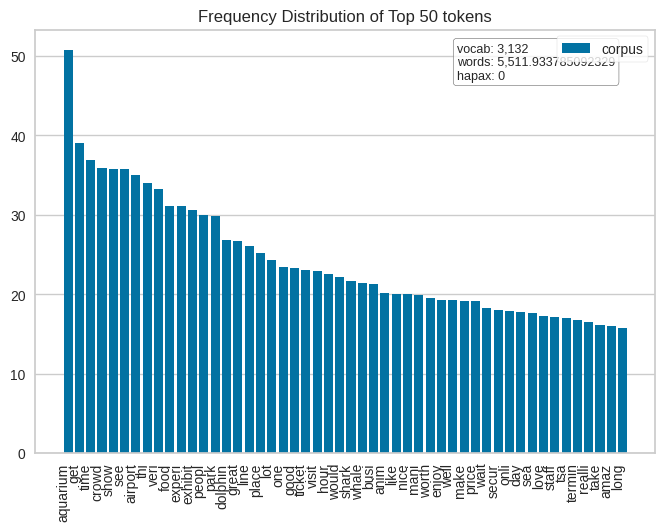

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
features = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(vectorised_train_documents)
visualizer.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(y_train)
test_labels = mlb.transform(y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knnClf = KNeighborsClassifier()

knnClf.fit(vectorised_train_documents, train_labels)
knnPredictions = knnClf.predict(vectorised_test_documents)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(vectorised_train_documents, train_labels)
dtPreds = dtClassifier.predict(vectorised_test_documents)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier(n_jobs=-1)
rfClassifier.fit(vectorised_train_documents, train_labels)
rfPreds = rfClassifier.predict(vectorised_test_documents)

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagClassifier = OneVsRestClassifier(BaggingClassifier(n_jobs=-1))
bagClassifier.fit(vectorised_train_documents, train_labels)
bagPreds = bagClassifier.predict(vectorised_test_documents)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boostClassifier = OneVsRestClassifier(GradientBoostingClassifier())
boostClassifier.fit(vectorised_train_documents, train_labels)
boostPreds = boostClassifier.predict(vectorised_test_documents)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nbClassifier = OneVsRestClassifier(MultinomialNB())
nbClassifier.fit(vectorised_train_documents, train_labels)
nbPreds = nbClassifier.predict(vectorised_test_documents)

In [ ]:
from sklearn.svm import LinearSVC

svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(vectorised_train_documents, train_labels)

svmPreds = svmClassifier.predict(vectorised_test_documents)

In [ ]:
train_labels

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0]])

In [ ]:
#from sklearn.svm import LinearSVC
#from skmultilearn.problem_transform import BinaryRelevance

#BinaryRelSVC = BinaryRelevance(LinearSVC())
#BinaryRelSVC.fit(vectorised_train_documents, train_labels)

#BinaryRelSVCPreds = BinaryRelSVC.predict(vectorised_test_documents)

In [ ]:
from sklearn.svm import LinearSVC

svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(vectorised_train_documents, train_labels)

svmPreds = svmClassifier.predict(vectorised_test_documents)

In [ ]:
from skmultilearn.problem_transform import LabelPowerset

powerSetSVC = LabelPowerset(LinearSVC())
powerSetSVC.fit(vectorised_train_documents, train_labels)

powerSetSVCPreds = powerSetSVC.predict(vectorised_test_documents)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
ModelsPerformance = {}

def metricsReport(modelName, test_labels, predictions):
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    micro_f1 = f1_score(test_labels, predictions, average='micro')

    hamLoss = hamming_loss(test_labels, predictions)
    ModelsPerformance[modelName] = micro_f1

In [ ]:
ModelsAccPerformance = {}
ModelsPerformance = {}
model_name = 'KNeighborsClassifier'
metricsReport('KNeighborsClassifier',test_labels,knnPredictions)

In [ ]:
ModelsPerformance

{'KNeighborsClassifier': 0.667668351318126}

In [ ]:
from sklearn import metrics
# Compute accuracy
accuracy = metrics.accuracy_score(test_labels, knnPredictions)
print(f"Accuracy: {accuracy:.2f}")
ModelsAccPerformance[model_name]=accuracy

Accuracy: 0.10


In [ ]:
model_name = 'DecisionTreeClassifier'
metricsReport('DecisionTreeClassifier',test_labels,dtPreds)
ModelsPerformance

{'KNeighborsClassifier': 0.667668351318126,
 'DecisionTreeClassifier': 0.739414532148458}

In [ ]:
accuracy = metrics.accuracy_score(test_labels, dtPreds)
print(f"Accuracy: {accuracy:.2f}")
ModelsAccPerformance[model_name]=accuracy

Accuracy: 0.37


In [ ]:
model_name = 'RandomForestClassifier'

metricsReport('RandomForestClassifier',test_labels,rfPreds)
ModelsPerformance


{'KNeighborsClassifier': 0.667668351318126,
 'DecisionTreeClassifier': 0.739414532148458,
 'RandomForestClassifier': 0.7189021691013724}

In [ ]:
accuracy = metrics.accuracy_score(test_labels, rfPreds)
print(f"Accuracy: {accuracy:.2f}")
ModelsAccPerformance[model_name]=accuracy

Accuracy: 0.24


In [ ]:
model_name = 'BaggingClassifier'

metricsReport('BaggingClassifier',test_labels,bagPreds)
ModelsPerformance

{'KNeighborsClassifier': 0.667668351318126,
 'DecisionTreeClassifier': 0.739414532148458,
 'RandomForestClassifier': 0.7189021691013724,
 'BaggingClassifier': 0.8031754032258066}

In [ ]:
accuracy = metrics.accuracy_score(test_labels, bagPreds)
print(f"Accuracy: {accuracy:.2f}")
ModelsAccPerformance[model_name]=accuracy

Accuracy: 0.20


In [ ]:
model_name = 'GradientBoostingClassifier'

metricsReport('GradientBoostingClassifier',test_labels,boostPreds)
ModelsPerformance

{'KNeighborsClassifier': 0.667668351318126,
 'DecisionTreeClassifier': 0.739414532148458,
 'RandomForestClassifier': 0.7189021691013724,
 'BaggingClassifier': 0.8031754032258066,
 'GradientBoostingClassifier': 0.8107833163784335}

In [ ]:
accuracy = metrics.accuracy_score(test_labels, boostPreds)
print(f"Accuracy: {accuracy:.2f}")
ModelsAccPerformance[model_name]=accuracy

Accuracy: 0.22


In [ ]:
model_name = 'MultinomialNB'

metricsReport('MultinomialNB',test_labels,nbPreds)
ModelsPerformance

{'KNeighborsClassifier': 0.667668351318126,
 'DecisionTreeClassifier': 0.739414532148458,
 'RandomForestClassifier': 0.7189021691013724,
 'BaggingClassifier': 0.8031754032258066,
 'GradientBoostingClassifier': 0.8107833163784335,
 'MultinomialNB': 0.5970873786407768}

In [ ]:
accuracy = metrics.accuracy_score(test_labels, nbPreds)
print(f"Accuracy: {accuracy:.2f}")
ModelsAccPerformance[model_name]=accuracy

Accuracy: 0.00


In [ ]:
model_name = 'LinearSVC'

metricsReport('LinearSVC',test_labels,svmPreds)
ModelsPerformance

{'KNeighborsClassifier': 0.667668351318126,
 'DecisionTreeClassifier': 0.739414532148458,
 'RandomForestClassifier': 0.7189021691013724,
 'BaggingClassifier': 0.8031754032258066,
 'GradientBoostingClassifier': 0.8107833163784335,
 'MultinomialNB': 0.5970873786407768,
 'LinearSVC': 0.7557813126587355}

In [ ]:
accuracy = metrics.accuracy_score(test_labels, nbPreds)
print(f"Accuracy: {accuracy:.2f}")
ModelsAccPerformance[model_name]=accuracy

Accuracy: 0.00


In [ ]:
model_name = 'LabelPowerset'

metricsReport('LabelPowerset',test_labels,powerSetSVCPreds)
ModelsPerformance

{'KNeighborsClassifier': 0.667668351318126,
 'DecisionTreeClassifier': 0.739414532148458,
 'RandomForestClassifier': 0.7189021691013724,
 'BaggingClassifier': 0.8031754032258066,
 'GradientBoostingClassifier': 0.8107833163784335,
 'MultinomialNB': 0.5970873786407768,
 'LinearSVC': 0.7557813126587355,
 'LabelPowerset': 0.6992555134148055}

In [ ]:
accuracy = metrics.accuracy_score(test_labels, powerSetSVCPreds)
print(f"Accuracy: {accuracy:.2f}")
ModelsAccPerformance[model_name]=accuracy

Accuracy: 0.35


In [ ]:
print(ModelsPerformance)

{'KNeighborsClassifier': 0.667668351318126, 'DecisionTreeClassifier': 0.739414532148458, 'RandomForestClassifier': 0.7189021691013724, 'BaggingClassifier': 0.8031754032258066, 'GradientBoostingClassifier': 0.8107833163784335, 'MultinomialNB': 0.5970873786407768, 'LinearSVC': 0.7557813126587355, 'LabelPowerset': 0.6992555134148055}


In [ ]:
from tabulate import tabulate

my_dict = {key: [value] for key, value in ModelsPerformance.items()}

headers = my_dict.keys()
rows = [my_dict[key] for key in headers]
table = zip(*rows)

print(tabulate(table, headers=headers))


  KNeighborsClassifier    DecisionTreeClassifier    RandomForestClassifier    BaggingClassifier    GradientBoostingClassifier    MultinomialNB    LinearSVC    LabelPowerset
----------------------  ------------------------  ------------------------  -------------------  ----------------------------  ---------------  -----------  ---------------
              0.667668                  0.739415                  0.718902             0.803175                      0.810783         0.597087     0.755781         0.699256


In [ ]:
my_dict = {key: [value] for key, value in ModelsAccPerformance.items()}

headers = my_dict.keys()
rows = [my_dict[key] for key in headers]
table = zip(*rows)

print(tabulate(table, headers=headers))

  KNeighborsClassifier    DecisionTreeClassifier    RandomForestClassifier    BaggingClassifier    GradientBoostingClassifier    MultinomialNB    LinearSVC    LabelPowerset
----------------------  ------------------------  ------------------------  -------------------  ----------------------------  ---------------  -----------  ---------------
                   0.1                  0.372727                  0.236364                  0.2                      0.221212                0            0         0.354545
